In [1]:
import os
current_directory = os.getcwd()
print(current_directory)

/Users/macbookpro/hdd/MSc/Dissertation/multilabeltextclassification


In [2]:
import numpy
numpy.version.version

'1.22.0'

In [3]:
# importing libraries

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras_preprocessing.sequence import pad_sequences
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.python.keras.models import Model, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation, SimpleRNN
from tensorflow.keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers import SGD

# For custom metrics
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn as sns
from IPython.display import Image

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
import string
import gensim

sns.set_style("whitegrid")
np.random.seed(0)

2023-03-30 20:23:56.326447: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
df = pd.read_csv('/Users/macbookpro/hdd/MSc/Dissertation/multilabeltextclassification/githubissuedata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226163 entries, 0 to 226162
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   title             225152 non-null  object
 1   body              225866 non-null  object
 2   task              226163 non-null  int64 
 3   bug               226163 non-null  int64 
 4   documentation     226163 non-null  int64 
 5   duplicate         226163 non-null  int64 
 6   enhancement       226163 non-null  int64 
 7   good_first_issue  226163 non-null  int64 
 8   help_wanted       226163 non-null  int64 
 9   invalid           226163 non-null  int64 
 10  question          226163 non-null  int64 
 11  wontfix           226163 non-null  int64 
 12  gitalk            226163 non-null  int64 
 13  priority_medium   226163 non-null  int64 
 14  priority_high     226163 non-null  int64 
 15  feature_request   226163 non-null  int64 
 16  feature           226163 non-null  int

In [5]:
df.head(10)

title  \
0  My Account Paid  laptop 1440 resolution  Updat...   
1  How to fix sleepimpl warning when ECS credenti...   
2                Slider doesnt work on touch devices   
3                                     add new labels   
4                  No lib sub folder in Boost folder   
5                          Add license notice to CLI   
6  Should show Powershell or AzureCLI code necess...   
7  tidboperator could not work with kubernetes 1.23    
8                                         Match Live   
9  AngularBug Make current location widget more g...   

                                                body  task  bug  \
0  Case:Distance between Registered email address...     0    1   
1   Prerequisites X Ive searched for previous sim...     0    1   
2   DescriptionSlider should work dragging in tou...     0    1   
3   DescriptionAdd ui and logic to permanently ad...     0    0   
4  Hi I am following thishttps://www.mlpack.org/d...     0    0   
5  The CLI is missing the license notice. Theres ...     0    0   
6  There is example output from Powershell and Az...     0    0   
7   Bug ReportWhat version of Kubernetes are you ...     0    1   
8   x Implement game logic x Calculate results ba...     0    0   
9  If youve never submitted an issue to the SORMA...     0    1   

   documentation  duplicate  enhancement  good_first_issue  help_wanted  \
0              0          0            0                 0            0   
1              0          0            0                 0            0   
2              0          0            0                 0            0   
3              0          0            1                 0            0   
4              0          0            0                 0            1   
5              0          0            0                 0            0   
6              0          0            1                 0            0   
7              0          0            0                 0            0   
8              0          0            1                 0            0   
9              0          0            0                 0            0   

   invalid  question  wontfix  gitalk  priority_medium  priority_high  \
0        1         0        0       0                0              0   
1        0         0        0       0                0              0   
2        0         0        0       0                0              0   
3        0         0        0       0                0              0   
4        0         1        0       0                0              0   
5        0         0        0       0                0              0   
6        0         0        0       0                0              0   
7        0         0        0       0                0              0   
8        0         0        0       0                0              0   
9        0         0        0       0                0              0   

   feature_request  feature  
0                0        0  
1                0        0  
2                0        0  
3                0        0  
4                0        0  
5                0        1  
6                0        0  
7                0        0  
8                0        0  
9                0        0

In [6]:
# check missing values in the dataset
print('The dataset has', df.isna().sum().sum(), 'missing values in test data.')
# check any duplicate records in the dataset
print('The dataset has', df.duplicated().sum(), 'duplicates in train data.')

The dataset has 1308 missing values in test data.
The dataset has 46411 duplicates in train data.


In [7]:
# remove missing values in the dataset
df.dropna(inplace= True)
# remove all duplicate records in the dataset
df.drop_duplicates(inplace= True)

In [8]:
# check missing values in the dataset
print('The dataset has', df.isna().sum().sum(), 'missing values in test data.')
# check any duplicate records in the dataset
print('The dataset has', df.duplicated().sum(), 'duplicates in train data.')

The dataset has 0 missing values in test data.
The dataset has 0 duplicates in train data.


In [9]:
# spliting dataset to train and test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=25)

In [10]:
test_df.shape

(35787, 17)

In [11]:
train_df.shape

(143145, 17)

In [13]:
#Convert text to vectors using keras preprocessing library tools


X_train = train_df["body"].values
X_test  = test_df["body"].values

y_train = train_df[["task","bug","documentation","duplicate","enhancement","good_first_issue","help_wanted","invalid","question","wontfix","gitalk","priority_medium","priority_high","feature_request","feature"]].values
y_test  = test_df[["task","bug","documentation","duplicate","enhancement","good_first_issue","help_wanted","invalid","question","wontfix","gitalk","priority_medium","priority_high","feature_request","feature"]].values

In [15]:
num_words = 20000 #Max. words to use per issue label
max_features = 200000 #Max. number of unique words in embeddinbg vector
max_len = 500 #Max. number of words per issue to be use
embedding_dims = 128 
num_epochs = 25
val_split = 0.1
batch_size2 = 256

In [16]:
X_train[1]

'Tidying up the code to remove redundant processing'

In [17]:
#Issue body Tokenization
tokenizer = tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(list(X_train))

#Convert tokenized issue body text to sequnces
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
 
# padding the sequences
X_train = pad_sequences(X_train, max_len)
X_test  = pad_sequences(X_test,  max_len)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape: (143145, 500)
X_test shape:  (35787, 500)


In [18]:
#We used early callback functionality that allows you to specify the performance measure to monitor, the trigger, and once triggered. It will stop the training process.
early = EarlyStopping(monitor="val_loss", mode="min", patience=4)

In [19]:
#Writing functions for Precision, Recall, F1-Measure, AUC, mean etc evaluaiton metrics to evaluate the model

#Import necessary libraries
4# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


def precision(y_true, y_pred):
    #Calculating precision, a metric for multi-label classification of how many selected items are relevant.
    
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    #Calculating recall, a metric for multi-label classification of how many relevant items are selected.
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

  #Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def fbeta_score(y_true, y_pred, beta=1):
    '''Calculates the F score, the weighted harmonic mean of precision and recall.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    '''
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
        
    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0.0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def auroc(y_true, y_pred):
    auc = tf.keras.metrics.AUC(y_true, y_pred)[1]
    #auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

def fmeasure(y_true, y_pred):
    #Calculates the f-measure, the harmonic mean of precision and recall.
    return fbeta_score(y_true, y_pred, beta=1)


fscore = f1score = fmeasure

In [20]:
#1) Neural Network (NN)
nn_model = Sequential()
embedding_layer = Embedding(input_dim=max_features,output_dim=embedding_dims,input_length=max_len)
nn_model.add(embedding_layer)
nn_model.add(GlobalMaxPool1D())
nn_model.add(Dense(50,activation='relu'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(15,activation='sigmoid'))


In [21]:

opt = Adam(learning_rate=0.1)
nn_model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy', mean_pred, fmeasure, precision, recall])


In [22]:

#input_shape = X_train.shape  
#nn_model.build(input_shape) 
print(nn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          25600000  
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 50)                6450      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                765       
                                                                 
Total params: 25,607,215
Trainable params: 25,607,215
Non-trainable params: 0
____________________________________________

In [23]:
nn_model_fit = nn_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Epoch 1/25
504/504 [==============================] - 151s 297ms/step - loss: 0.1794 - accuracy: 0.5938 - mean_pred: 0.0841 - fmeasure: 0.4580 - precision: 0.7812 - recall: 0.3326 - val_loss: 0.1710 - val_accuracy: 0.6105 - val_mean_pred: 0.0818 - val_fmeasure: 0.4226 - val_precision: 0.8902 - val_recall: 0.2775
Epoch 2/25
504/504 [==============================] - 149s 296ms/step - loss: 0.1741 - accuracy: 0.5950 - mean_pred: 0.0809 - fmeasure: 0.4251 - precision: 0.8658 - recall: 0.2838 - val_loss: 0.1696 - val_accuracy: 0.6208 - val_mean_pred: 0.0797 - val_fmeasure: 0.4421 - val_precision: 0.8657 - val_recall: 0.2975
Epoch 3/25
504/504 [==============================] - 149s 295ms/step - loss: 0.1730 - accuracy: 0.5944 - mean_pred: 0.0808 - fmeasure: 0.4230 - precision: 0.8838 - recall: 0.2808 - val_loss: 0.1774 - val_accuracy: 0.6137 - val_mean_pred: 0.0783 - val_fmeasure: 0.4418 - val_precision: 0.8720 - val_recall: 0.2964
Epoch 4/25
504/504 [==============================] - 149s

In [24]:
#from tensorflow.keras.utils import plot_model

In [25]:
#plot the nn_model architecture

#plot_model(nn_model, to_file='nn_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='nn_model_plot.png')

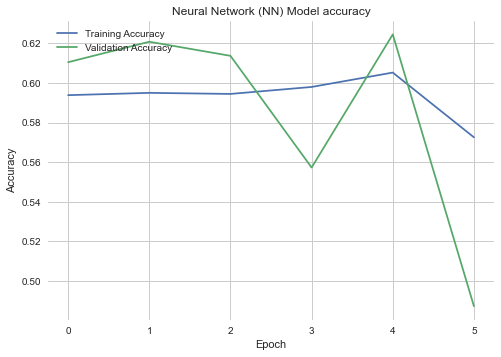

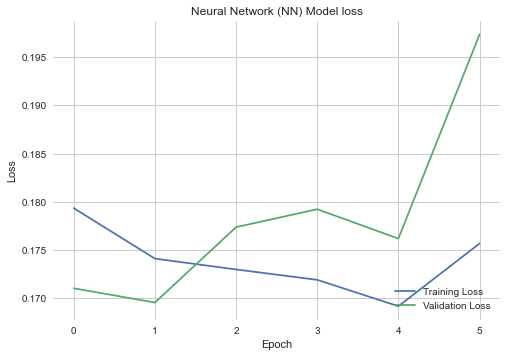

In [26]:
# Plot training & validation accuracy values
plt.plot(nn_model_fit.history['accuracy'])
plt.plot(nn_model_fit.history['val_accuracy'])
plt.title('Neural Network (NN) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(nn_model_fit.history['loss'])
plt.plot(nn_model_fit.history['val_loss'])
plt.title('Neural Network (NN) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [27]:
#2) Convolutional Neural Network (CNN)

CNN_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    # ... 100 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
    Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    #It will be added after the activation function between a convolutional and a max-pooling layer.
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(15, activation = 'sigmoid')
])

In [28]:
#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

CNN_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, recall])

In [29]:
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          25600000  
                                                                 
 spatial_dropout1d (SpatialD  (None, 500, 128)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 500, 100)          51300     
                                                                 
 batch_normalization (BatchN  (None, 500, 100)         400       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 500, 100)          0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 100)             

In [30]:
plot_model(nn_model, to_file='nn_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='nn_model_plot.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [31]:
CNN_model_fit = CNN_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Epoch 1/25
504/504 [==============================] - 378s 748ms/step - loss: 0.1761 - accuracy: 0.6189 - mean_pred: 0.0842 - fmeasure: 0.5367 - precision: 0.7220 - recall: 0.4297 - val_loss: 0.1749 - val_accuracy: 0.6611 - val_mean_pred: 0.1198 - val_fmeasure: 0.5880 - val_precision: 0.7610 - val_recall: 0.4796
Epoch 2/25
504/504 [==============================] - 375s 745ms/step - loss: 0.1511 - accuracy: 0.6698 - mean_pred: 0.0817 - fmeasure: 0.6062 - precision: 0.7593 - recall: 0.5054 - val_loss: 0.1643 - val_accuracy: 0.6699 - val_mean_pred: 0.1101 - val_fmeasure: 0.5760 - val_precision: 0.7976 - val_recall: 0.4511
Epoch 3/25
504/504 [==============================] - 372s 738ms/step - loss: 0.1436 - accuracy: 0.6842 - mean_pred: 0.0814 - fmeasure: 0.6284 - precision: 0.7714 - recall: 0.5308 - val_loss: 0.1709 - val_accuracy: 0.6740 - val_mean_pred: 0.1181 - val_fmeasure: 0.5766 - val_precision: 0.8017 - val_recall: 0.4506
Epoch 4/25
504/504 [==============================] - 384s

In [32]:
CNN_train_score = CNN_model.evaluate(X_train, y_train, batch_size = batch_size2, verbose = 1)
print('Train loss:', CNN_train_score[0])
print('Train accuracy:', CNN_train_score[1])

560/560 [==============================] - 48s 85ms/step - loss: 0.1398 - accuracy: 0.7413 - mean_pred: 0.0859 - fmeasure: 0.6834 - precision: 0.8278 - recall: 0.5823
Train loss: 0.13975094258785248
Train accuracy: 0.7412553429603577


In [33]:
CNN_test_score = CNN_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', CNN_test_score[0])
print('Test Accuracy:', CNN_test_score[1])

140/140 [==============================] - 12s 83ms/step - loss: 0.1603 - accuracy: 0.6792 - mean_pred: 0.0860 - fmeasure: 0.6204 - precision: 0.7578 - recall: 0.5255
Test Loss: 0.16033262014389038
Test Accuracy: 0.6792410612106323


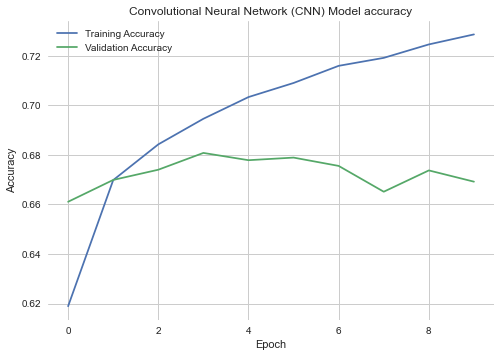

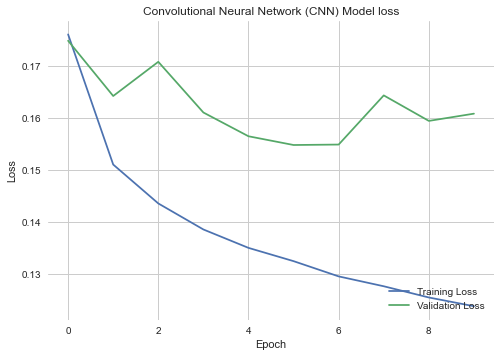

In [34]:
# Plot training & validation accuracy values
plt.plot(CNN_model_fit.history['accuracy'])
plt.plot(CNN_model_fit.history['val_accuracy'])
plt.title('Convolutional Neural Network (CNN) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(CNN_model_fit.history['loss'])
plt.plot(CNN_model_fit.history['val_loss'])
plt.title('Convolutional Neural Network (CNN) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [35]:
#3) Recurrent Neural Networks (RNN)

RNN_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    SimpleRNN(128),
    #Bidirectional(LSTM(25, return_sequences=True)),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    Dense(15, activation = 'sigmoid')
])


In [36]:
#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

RNN_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, recall])

In [37]:
RNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 128)          25600000  
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 15)                1935      
                                                                 
Total params: 25,634,831
Trainable params: 25,634,831
Non-trainable params: 0
_________________________________________________________________


In [38]:
RNN_model_fit = RNN_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Epoch 1/25
504/504 [==============================] - 369s 730ms/step - loss: 0.2569 - accuracy: 0.4592 - mean_pred: 0.1296 - fmeasure: 0.2874 - precision: 0.4462 - recall: 0.2408 - val_loss: 0.2080 - val_accuracy: 0.4839 - val_mean_pred: 0.0961 - val_fmeasure: 0.3673 - val_precision: 0.5144 - val_recall: 0.2864
Epoch 2/25
504/504 [==============================] - 367s 727ms/step - loss: 0.2045 - accuracy: 0.4995 - mean_pred: 0.0952 - fmeasure: 0.3451 - precision: 0.5948 - recall: 0.2453 - val_loss: 0.2057 - val_accuracy: 0.4842 - val_mean_pred: 0.0948 - val_fmeasure: 0.3166 - val_precision: 0.5675 - val_recall: 0.2200
Epoch 3/25
504/504 [==============================] - 369s 733ms/step - loss: 0.1970 - accuracy: 0.4950 - mean_pred: 0.0868 - fmeasure: 0.3279 - precision: 0.6161 - recall: 0.2242 - val_loss: 0.1954 - val_accuracy: 0.4893 - val_mean_pred: 0.0852 - val_fmeasure: 0.3286 - val_precision: 0.6093 - val_recall: 0.2253
Epoch 4/25
504/504 [==============================] - 2201

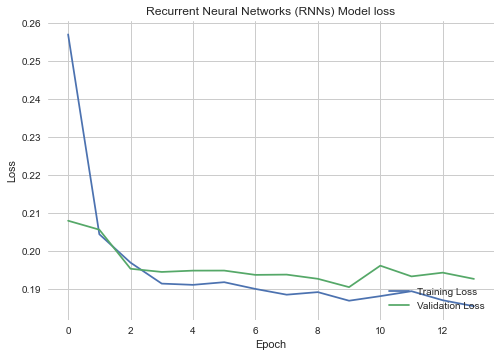

In [39]:
# Plot training & validation accuracy values
plt.plot(RNN_model_fit.history['accuracy'])
plt.plot(RNN_model_fit.history['val_accuracy'])
plt.title('Recurrent Neural Networks (RNNs) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(RNN_model_fit.history['loss'])
plt.plot(RNN_model_fit.history['val_loss'])
plt.title('Recurrent Neural Networks (RNNs) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [40]:
#4) LSTM

LSTM_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    #It will be added after the activation function between a convolutional and a max-pooling layer.
    BatchNormalization(),
    Dropout(0.5),
    Dense(50, activation = 'relu'),
    Dense(15, activation = 'sigmoid')
])

LSTM_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, recall])

In [41]:
LSTM_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 128)          25600000  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 500, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 50)               

In [42]:
LSTM_model_fit = LSTM_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Epoch 1/25
504/504 [==============================] - 951s 2s/step - loss: 0.1802 - accuracy: 0.5998 - mean_pred: 0.0857 - fmeasure: 0.5042 - precision: 0.7102 - recall: 0.3960 - val_loss: 0.1608 - val_accuracy: 0.6407 - val_mean_pred: 0.0874 - val_fmeasure: 0.5898 - val_precision: 0.7075 - val_recall: 0.5060
Epoch 2/25
504/504 [==============================] - 939s 2s/step - loss: 0.1572 - accuracy: 0.6565 - mean_pred: 0.0811 - fmeasure: 0.5839 - precision: 0.7484 - recall: 0.4798 - val_loss: 0.1523 - val_accuracy: 0.6669 - val_mean_pred: 0.0831 - val_fmeasure: 0.6195 - val_precision: 0.7231 - val_recall: 0.5421
Epoch 3/25
504/504 [==============================] - 950s 2s/step - loss: 0.1497 - accuracy: 0.6755 - mean_pred: 0.0810 - fmeasure: 0.6113 - precision: 0.7628 - recall: 0.5107 - val_loss: 0.1504 - val_accuracy: 0.6710 - val_mean_pred: 0.0814 - val_fmeasure: 0.6243 - val_precision: 0.7300 - val_recall: 0.5457
Epoch 4/25
504/504 [==============================] - 885s 2s/step 

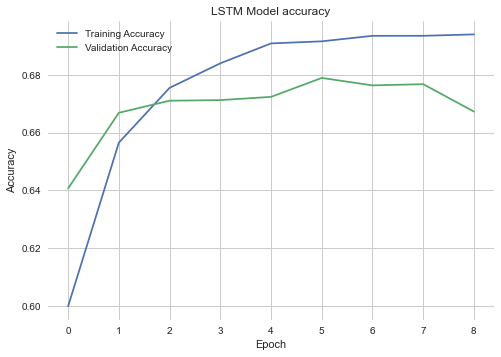

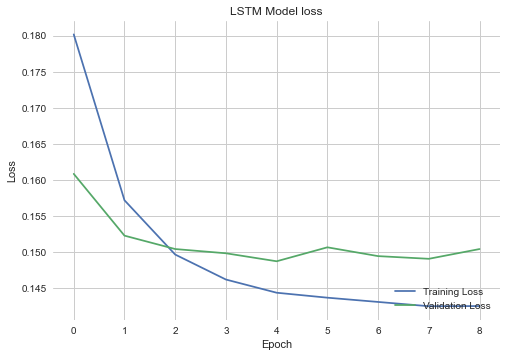

In [43]:
# Plot training & validation accuracy values
plt.plot(LSTM_model_fit.history['accuracy'])
plt.plot(LSTM_model_fit.history['val_accuracy'])
plt.title('LSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(LSTM_model_fit.history['loss'])
plt.plot(LSTM_model_fit.history['val_loss'])
plt.title('LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [44]:
#5) BI-LSTM
BI_LSTM_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    Bidirectional(LSTM(25, return_sequences=True)),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(15, activation = 'sigmoid')
])

2023-03-31 02:08:32.627716: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-31 02:08:32.629920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-31 02:08:32.631789: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [45]:

BI_LSTM_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, recall])

In [46]:
BI_LSTM_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 128)          25600000  
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 500, 128)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 500, 50)          30800     
 l)                                                              
                                                                 
 batch_normalization_2 (Batc  (None, 500, 50)          200       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 500, 50)           0         
                                                      

In [47]:
BI_LSTM_model_fit = BI_LSTM_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Epoch 1/25


2023-03-31 02:08:33.278574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-31 02:08:33.280823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-31 02:08:33.282445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

504/504 [==============================] - ETA: 0s - loss: 0.1681 - accuracy: 0.6316 - mean_pred: 0.0829 - fmeasure: 0.5514 - precision: 0.7355 - recall: 0.4453

2023-03-31 02:19:53.758388: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-31 02:19:53.760774: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-31 02:19:53.762359: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

504/504 [==============================] - 702s 1s/step - loss: 0.1681 - accuracy: 0.6316 - mean_pred: 0.0829 - fmeasure: 0.5514 - precision: 0.7355 - recall: 0.4453 - val_loss: 0.2095 - val_accuracy: 0.6666 - val_mean_pred: 0.1593 - val_fmeasure: 0.5760 - val_precision: 0.7907 - val_recall: 0.4533
Epoch 2/25
504/504 [==============================] - 748s 1s/step - loss: 0.1470 - accuracy: 0.6792 - mean_pred: 0.0812 - fmeasure: 0.6176 - precision: 0.7660 - recall: 0.5182 - val_loss: 0.1770 - val_accuracy: 0.6795 - val_mean_pred: 0.1322 - val_fmeasure: 0.6218 - val_precision: 0.7641 - val_recall: 0.5245
Epoch 3/25
504/504 [==============================] - 727s 1s/step - loss: 0.1403 - accuracy: 0.6958 - mean_pred: 0.0812 - fmeasure: 0.6399 - precision: 0.7796 - recall: 0.5434 - val_loss: 0.1660 - val_accuracy: 0.6855 - val_mean_pred: 0.1188 - val_fmeasure: 0.6089 - val_precision: 0.7956 - val_recall: 0.4935
Epoch 4/25
504/504 [==============================] - 616s 1s/step - loss: 0.1

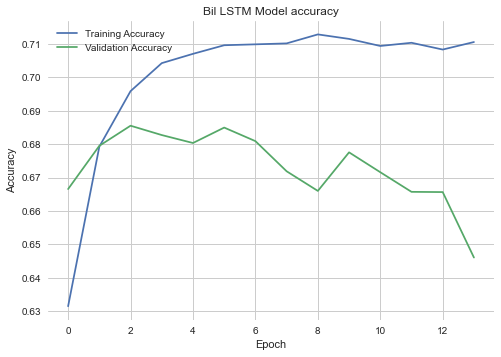

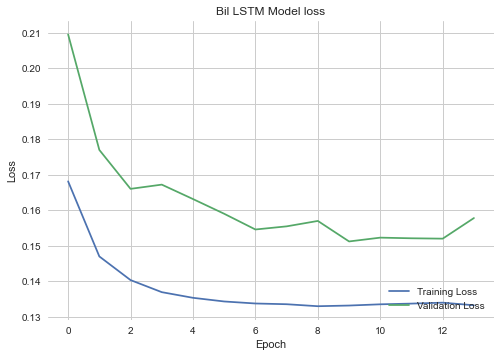

In [48]:
# Plot training & validation accuracy values
plt.plot(BI_LSTM_model_fit.history['accuracy'])
plt.plot(BI_LSTM_model_fit.history['val_accuracy'])
plt.title('Bil LSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(BI_LSTM_model_fit.history['loss'])
plt.plot(BI_LSTM_model_fit.history['val_loss'])
plt.title('Bil LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [49]:
#6) GRU
GRU_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    #So, using this feature will enable the model to look at the context on both the left and the right.
    GRU(64, dropout=0.2, recurrent_dropout=0.2),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(15, activation = 'sigmoid')
])

In [50]:

GRU_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, recall])

In [51]:
GRU_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 128)          25600000  
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 15)                1935      
                                                      

In [52]:
GRU_model_fit = GRU_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Epoch 1/25
504/504 [==============================] - 897s 2s/step - loss: 0.1621 - accuracy: 0.6464 - mean_pred: 0.0845 - fmeasure: 0.5738 - precision: 0.7349 - recall: 0.4740 - val_loss: 0.1451 - val_accuracy: 0.6680 - val_mean_pred: 0.0808 - val_fmeasure: 0.6061 - val_precision: 0.7585 - val_recall: 0.5050
Epoch 2/25
504/504 [==============================] - 881s 2s/step - loss: 0.1364 - accuracy: 0.7030 - mean_pred: 0.0816 - fmeasure: 0.6506 - precision: 0.7811 - recall: 0.5581 - val_loss: 0.1413 - val_accuracy: 0.6831 - val_mean_pred: 0.0808 - val_fmeasure: 0.6298 - val_precision: 0.7636 - val_recall: 0.5362
Epoch 3/25
504/504 [==============================] - 873s 2s/step - loss: 0.1272 - accuracy: 0.7227 - mean_pred: 0.0814 - fmeasure: 0.6751 - precision: 0.7992 - recall: 0.5848 - val_loss: 0.1424 - val_accuracy: 0.6886 - val_mean_pred: 0.0794 - val_fmeasure: 0.6360 - val_precision: 0.7669 - val_recall: 0.5437
Epoch 4/25
504/504 [==============================] - 867s 2s/step 

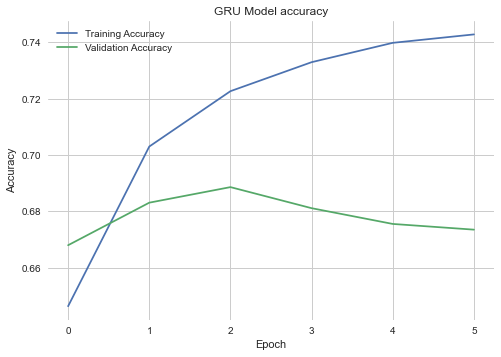

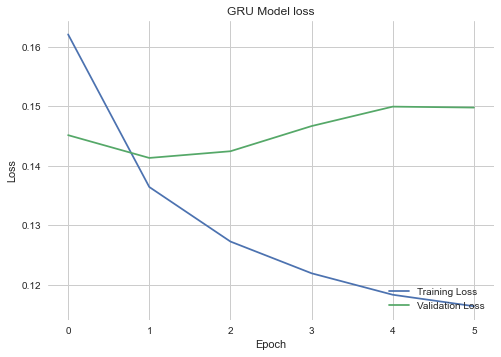

In [53]:
# Plot training & validation accuracy values
plt.plot(GRU_model_fit.history['accuracy'])
plt.plot(GRU_model_fit.history['val_accuracy'])
plt.title('GRU Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(GRU_model_fit.history['loss'])
plt.plot(GRU_model_fit.history['val_loss'])
plt.title('GRU Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [54]:
#7) Bil GRU
BI_GRU_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    #So, using this feature will enable the model to look at the context on both the left and the right.
    Bidirectional(GRU(units=64, dropout=0.2, recurrent_dropout=0.2)),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(15, activation = 'sigmoid')
])


In [55]:
BI_GRU_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, recall])

In [56]:
BI_GRU_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 128)          25600000  
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 15)               

In [57]:
BI_GRU_model_fit = GRU_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Epoch 1/25
504/504 [==============================] - 658s 1s/step - loss: 0.1148 - accuracy: 0.7471 - mean_pred: 0.0812 - fmeasure: 0.7076 - precision: 0.8232 - recall: 0.6210 - val_loss: 0.1523 - val_accuracy: 0.6710 - val_mean_pred: 0.0775 - val_fmeasure: 0.6284 - val_precision: 0.7504 - val_recall: 0.5408
Epoch 2/25
504/504 [==============================] - 656s 1s/step - loss: 0.1139 - accuracy: 0.7483 - mean_pred: 0.0811 - fmeasure: 0.7097 - precision: 0.8256 - recall: 0.6229 - val_loss: 0.1585 - val_accuracy: 0.6683 - val_mean_pred: 0.0776 - val_fmeasure: 0.6292 - val_precision: 0.7281 - val_recall: 0.5543
Epoch 3/25
504/504 [==============================] - 2567s 5s/step - loss: 0.1134 - accuracy: 0.7504 - mean_pred: 0.0810 - fmeasure: 0.7107 - precision: 0.8268 - recall: 0.6237 - val_loss: 0.1526 - val_accuracy: 0.6676 - val_mean_pred: 0.0810 - val_fmeasure: 0.6158 - val_precision: 0.7428 - val_recall: 0.5262
Epoch 4/25
504/504 [==============================] - 9721s 19s/st

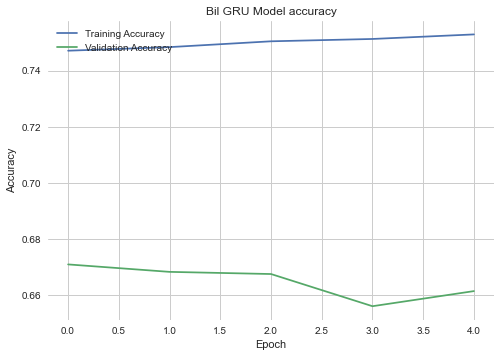

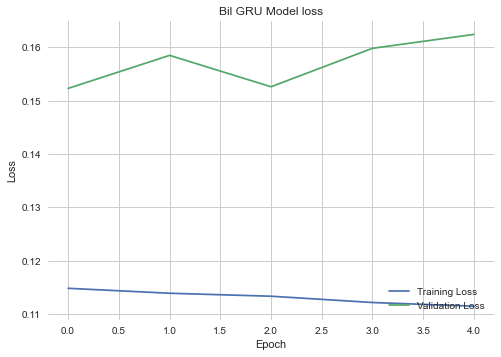

In [58]:
# Plot training & validation accuracy values
plt.plot(BI_GRU_model_fit.history['accuracy'])
plt.plot(BI_GRU_model_fit.history['val_accuracy'])
plt.title('Bil GRU Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(BI_GRU_model_fit.history['loss'])
plt.plot(BI_GRU_model_fit.history['val_loss'])
plt.title('Bil GRU Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [59]:
from chart_studio import plotly
import plotly.offline as py
import plotly.graph_objs as go


In [60]:
#Computing the highest of the evaluation matrics (per model)

trace = go.Table(
    header=dict(values=['Model', 'Loss', 'Accuracy', 'mean_pred', 'F-Measure', 'Precision', 'Recall'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[['Neural Network', 'CNN', 'RNNs', 'LSTM', 'BILSTM', 'GRU', 'BIGRU'],
                       [
                        #Loss Evaluation
                        round(np.max(nn_model_fit.history['loss']), 3), round(np.max(CNN_model_fit.history['loss']), 3), round(np.max(RNN_model_fit.history['loss']), 3), 
                        round(np.max(LSTM_model_fit.history['loss']), 3), round(np.max(BI_LSTM_model_fit.history['loss']), 3), round(np.max(GRU_model_fit.history['loss']), 3),
                        round(np.max(BI_GRU_model_fit.history['loss']), 3)],
                        
                        #Accuracy Evaluation
                        [round(np.max(nn_model_fit.history['accuracy']), 3), round(np.max(CNN_model_fit.history['accuracy']), 3), round(np.max(RNN_model_fit.history['accuracy']), 3), 
                        round(np.max(LSTM_model_fit.history['accuracy']), 3), round(np.max(BI_LSTM_model_fit.history['accuracy']), 3), round(np.max(GRU_model_fit.history['accuracy']), 3), 
                        round(np.max(BI_GRU_model_fit.history['accuracy']), 3)],
               
                        #mean_pred Evaluation
                        [round(np.max(nn_model_fit.history['mean_pred']), 3), round(np.max(CNN_model_fit.history['mean_pred']), 3), round(np.max(RNN_model_fit.history['mean_pred']), 3), 
                        round(np.max(LSTM_model_fit.history['mean_pred']), 3), round(np.max(BI_LSTM_model_fit.history['mean_pred']), 3), round(np.max(GRU_model_fit.history['mean_pred']), 3), 
                        round(np.max(BI_GRU_model_fit.history['mean_pred']), 3)],
               
                        #F1-Measure Evaluation
                        [round(np.max(nn_model_fit.history['fmeasure']), 3), round(np.max(CNN_model_fit.history['fmeasure']), 3), round(np.max(RNN_model_fit.history['fmeasure']), 3), 
                        round(np.max(LSTM_model_fit.history['fmeasure']), 3), round(np.max(BI_LSTM_model_fit.history['fmeasure']), 3), round(np.max(GRU_model_fit.history['fmeasure']), 3), 
                        round(np.max(BI_GRU_model_fit.history['fmeasure']), 3)],
               
                        #Precision Evaluation
                        [round(np.max(nn_model_fit.history['precision']), 3), round(np.max(CNN_model_fit.history['precision']), 3), round(np.max(RNN_model_fit.history['precision']), 3), 
                        round(np.max(LSTM_model_fit.history['precision']), 3), round(np.max(BI_LSTM_model_fit.history['precision']), 3), round(np.max(GRU_model_fit.history['precision']), 3), 
                        round(np.max(BI_GRU_model_fit.history['precision']), 3)],
                       
                       
                        #Recall Evaluation
                        [round(np.max(nn_model_fit.history['recall']), 3), round(np.max(CNN_model_fit.history['recall']), 3), round(np.max(RNN_model_fit.history['recall']), 3), 
                        round(np.max(LSTM_model_fit.history['recall']), 3), round(np.max(BI_LSTM_model_fit.history['recall']), 3), round(np.max(GRU_model_fit.history['recall']), 3), 
                        round(np.max(BI_GRU_model_fit.history['recall']), 3)]
                       ],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=800, height=400)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(data, filename = 'multi-label_with the max of the evaluation matrics (per model) _table')

In [61]:
#Computing the mean of the evaluation matrics (per model)

trace = go.Table(
    header=dict(values=['Model', 'Loss', 'Accuracy', 'mean_pred', 'F-Measure', 'Precision', 'Recall'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[['Neural Network', 'CNN', 'RNNs', 'LSTM', 'BILSTM', 'GRU', 'BIGRU'],
                       [
                        #Loss Evaluation
                        round(np.mean(nn_model_fit.history['loss']), 3), round(np.mean(CNN_model_fit.history['loss']), 3), round(np.mean(RNN_model_fit.history['loss']), 3), 
                        round(np.mean(LSTM_model_fit.history['loss']), 3), round(np.mean(BI_LSTM_model_fit.history['loss']), 3), round(np.mean(GRU_model_fit.history['loss']), 3),
                        round(np.mean(BI_GRU_model_fit.history['loss']), 3)],
                        
                        #Accuracy Evaluation
                        [round(np.mean(nn_model_fit.history['accuracy']), 3), round(np.mean(CNN_model_fit.history['accuracy']), 3), round(np.mean(RNN_model_fit.history['accuracy']), 3), 
                        round(np.mean(LSTM_model_fit.history['accuracy']), 3), round(np.mean(BI_LSTM_model_fit.history['accuracy']), 3), round(np.mean(GRU_model_fit.history['accuracy']), 3), 
                        round(np.mean(BI_GRU_model_fit.history['accuracy']), 3)],
               
                        #mean_pred Evaluation
                        [round(np.mean(nn_model_fit.history['mean_pred']), 3), round(np.mean(CNN_model_fit.history['mean_pred']), 3), round(np.mean(RNN_model_fit.history['mean_pred']), 3), 
                        round(np.mean(LSTM_model_fit.history['mean_pred']), 3), round(np.mean(BI_LSTM_model_fit.history['mean_pred']), 3), round(np.mean(GRU_model_fit.history['mean_pred']), 3), 
                        round(np.mean(BI_GRU_model_fit.history['mean_pred']), 3)],
               
                        #F1-Measure Evaluation
                        [round(np.mean(nn_model_fit.history['fmeasure']), 3), round(np.mean(CNN_model_fit.history['fmeasure']), 3), round(np.mean(RNN_model_fit.history['fmeasure']), 3), 
                        round(np.mean(LSTM_model_fit.history['fmeasure']), 3), round(np.mean(BI_LSTM_model_fit.history['fmeasure']), 3), round(np.mean(GRU_model_fit.history['fmeasure']), 3), 
                        round(np.mean(BI_GRU_model_fit.history['fmeasure']), 3)],
               
                        #Precision Evaluation
                        [round(np.mean(nn_model_fit.history['precision']), 3), round(np.mean(CNN_model_fit.history['precision']), 3), round(np.mean(RNN_model_fit.history['precision']), 3), 
                        round(np.mean(LSTM_model_fit.history['precision']), 3), round(np.mean(BI_LSTM_model_fit.history['precision']), 3), round(np.mean(GRU_model_fit.history['precision']), 3), 
                        round(np.mean(BI_GRU_model_fit.history['precision']), 3)],
                       
                       
                        #Recall Evaluation
                        [round(np.mean(nn_model_fit.history['recall']), 3), round(np.mean(CNN_model_fit.history['recall']), 3), round(np.mean(RNN_model_fit.history['recall']), 3), 
                        round(np.mean(LSTM_model_fit.history['recall']), 3), round(np.mean(BI_LSTM_model_fit.history['recall']), 3), round(np.mean(GRU_model_fit.history['recall']), 3), 
                        round(np.mean(BI_GRU_model_fit.history['recall']), 3)]
                       ],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=800, height=400)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(data, filename = 'multi-label_with the mean of the evaluation matrics (per model) _table')

In [69]:

print("nn_acc=")
print(nn_model_fit.history['accuracy'])
print("nn_valacc=")
print(nn_model_fit.history['val_accuracy'])

print("nn_loss=")
print(nn_model_fit.history['loss'])
print("nn_valloss=")
print(nn_model_fit.history['val_loss'])


print("cnn_acc=")
print(CNN_model_fit.history['accuracy'])
print("cnn_valacc=")
print(CNN_model_fit.history['val_accuracy'])

print("cnn_loss=")
print(CNN_model_fit.history['loss'])
print("cnn_valloss=")
print(CNN_model_fit.history['val_loss'])


print("rnn_acc=")
print(RNN_model_fit.history['accuracy'])
print("rnn_valacc=")
print(RNN_model_fit.history['val_accuracy'])

print("rnn_loss=")
print(RNN_model_fit.history['loss'])
print("rnn_valloss=")
print(RNN_model_fit.history['val_loss'])

print("lstm_acc=")
print(LSTM_model_fit.history['accuracy'])
print("lstm_valacc=")
print(LSTM_model_fit.history['val_accuracy'])

print("lstm_loss=")
print(LSTM_model_fit.history['loss'])
print("lstm_valloss=")
print(LSTM_model_fit.history['val_loss'])


print("bilstm_acc=")
print(BI_LSTM_model_fit.history['accuracy'])
print("bilstm_valacc=")
print(BI_LSTM_model_fit.history['val_accuracy'])

print("bilstm_loss=")
print(BI_LSTM_model_fit.history['loss'])
print("bilstm_valloss=")
print(BI_LSTM_model_fit.history['val_loss'])


print("gru_acc=")
print(GRU_model_fit.history['accuracy'])
print("gru_valacc=")
print(GRU_model_fit.history['val_accuracy'])

print("gru_loss=")
print(GRU_model_fit.history['loss'])
print("gru_valloss=")
print(GRU_model_fit.history['val_loss'])


print("bigru_acc=")
print(BI_GRU_model_fit.history['accuracy'])
print("bigru_valacc=")
print(BI_GRU_model_fit.history['val_accuracy'])

print("bigru_loss=")
print(BI_GRU_model_fit.history['loss'])

print("bigru_valloss=")
print(BI_GRU_model_fit.history['val_loss'])

nn_acc=
[0.5938212871551514, 0.5949856638908386, 0.5944423079490662, 0.5979663133621216, 0.6052394509315491, 0.5725219249725342]
nn_valacc=
[0.6104785203933716, 0.6208173036575317, 0.6136919260025024, 0.5572476387023926, 0.6245197057723999, 0.48718127608299255]
nn_loss=
[0.17935200035572052, 0.1741161048412323, 0.17299234867095947, 0.17191465198993683, 0.16918037831783295, 0.17568430304527283]
nn_valloss=
[0.17103919386863708, 0.16956230998039246, 0.1773778796195984, 0.17924067378044128, 0.17619021236896515, 0.19736847281455994]
cnn_acc=
[0.6189241409301758, 0.6697896718978882, 0.6842039823532104, 0.6945276856422424, 0.7032833695411682, 0.7089653015136719, 0.7158814072608948, 0.7190949320793152, 0.7245206832885742, 0.7285569906234741]
cnn_valacc=
[0.6610548496246338, 0.6698567867279053, 0.673978328704834, 0.6807544827461243, 0.6778204441070557, 0.678868293762207, 0.6755151748657227, 0.6651065349578857, 0.673698902130127, 0.6691582202911377]
cnn_loss=
[0.17614386975765228, 0.15111283957

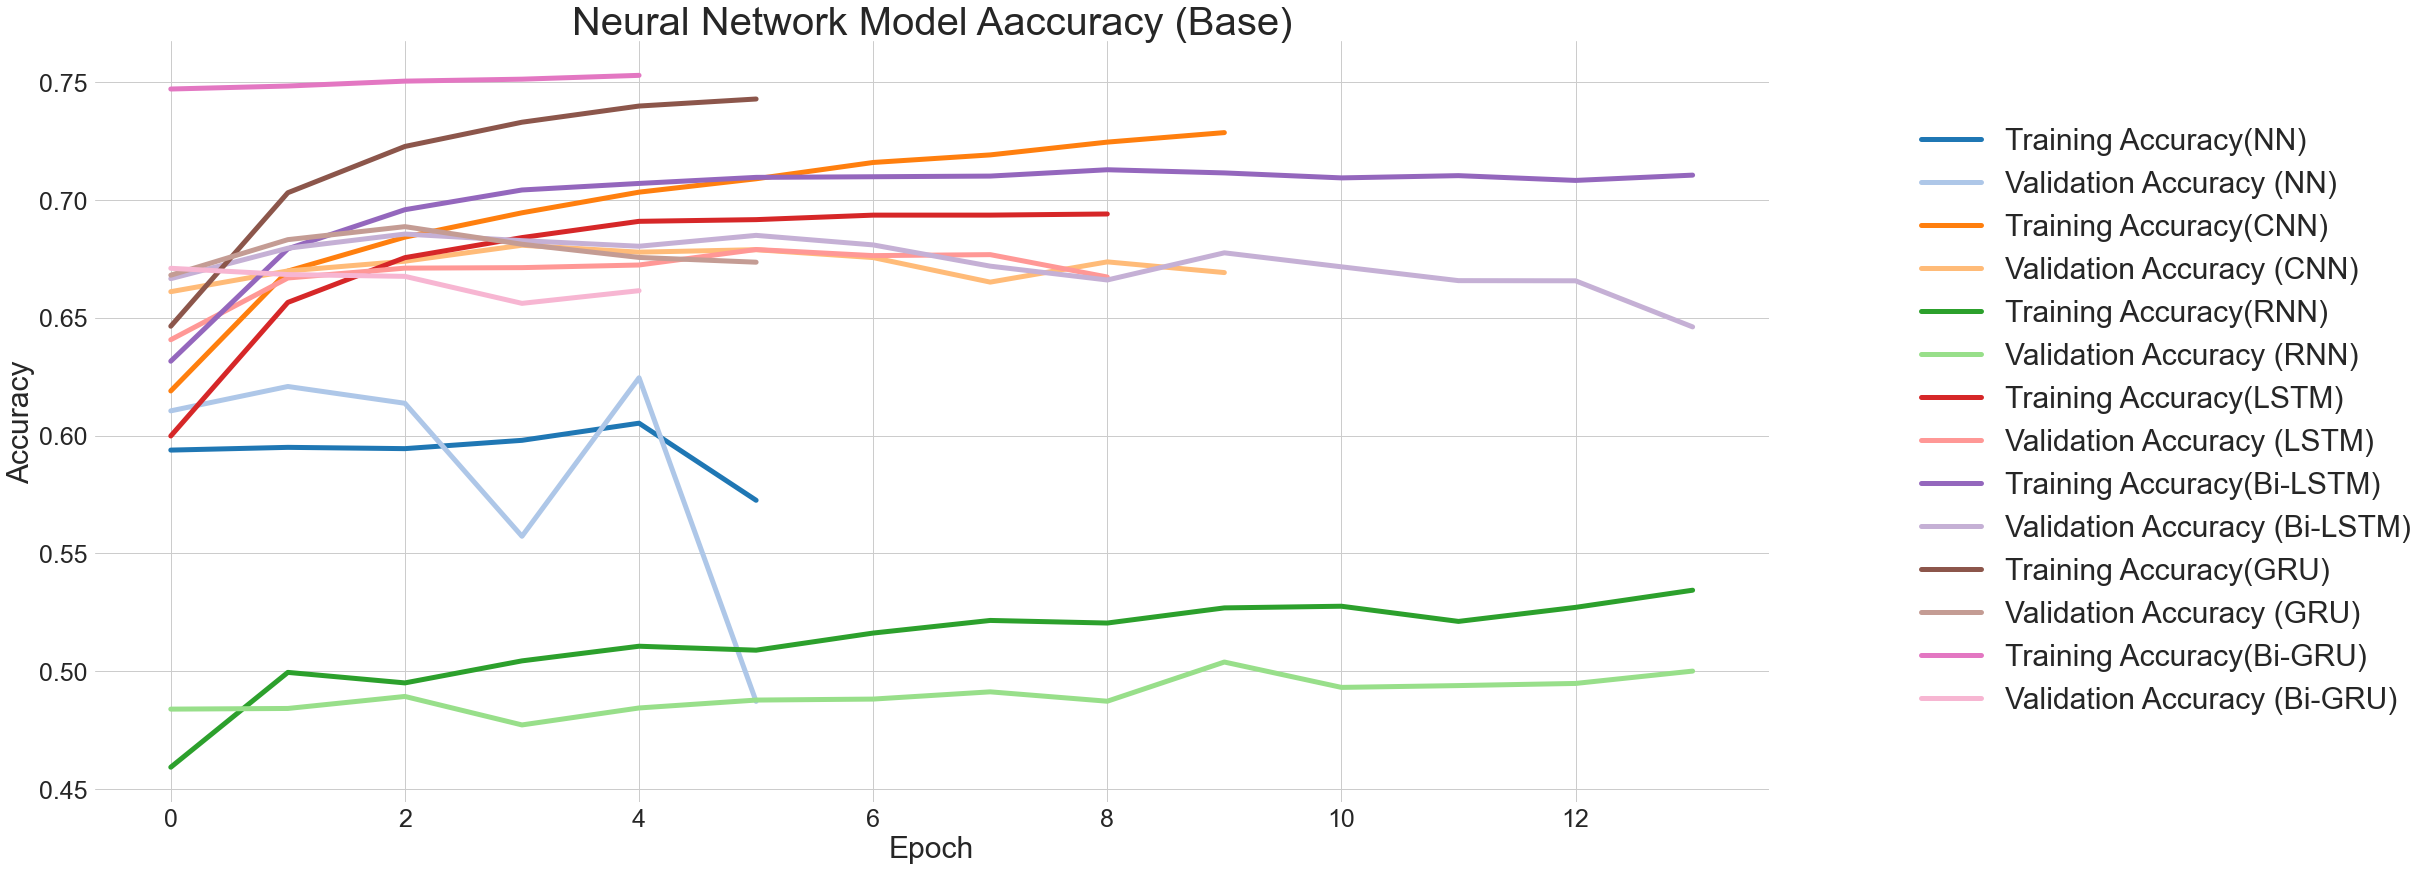

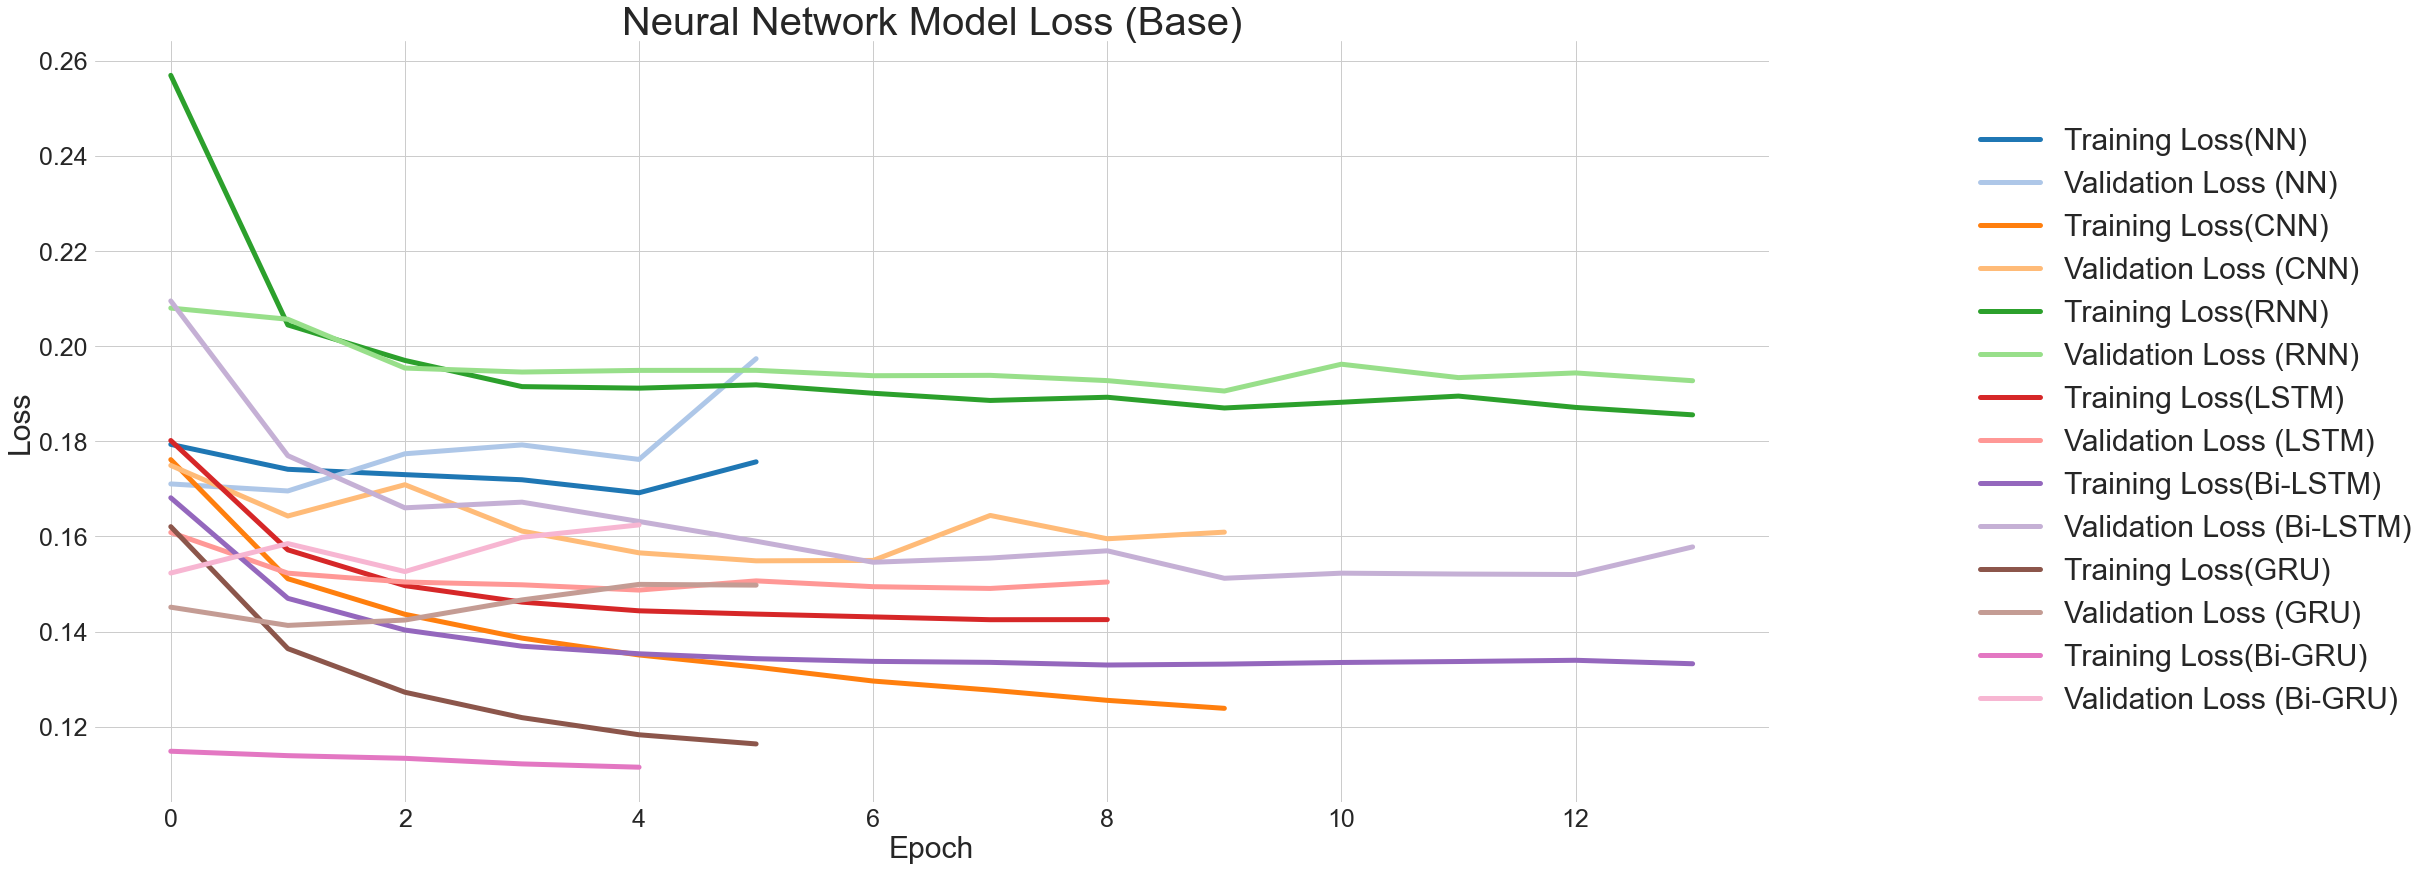

In [128]:
from matplotlib.cm import get_cmap
name = "tab20"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

plt.rc('lines', linewidth = 5)
fig, ax2 = plt.subplots(figsize=(30, 14))
ax2.set_prop_cycle(color=colors)
ax2.tick_params(axis='x', labelsize=25)
ax2.tick_params(axis='y', labelsize=25)

# Plot training & validation accuracy values
plt.plot(nn_model_fit.history['accuracy'])
plt.plot(nn_model_fit.history['val_accuracy'])
plt.plot(CNN_model_fit.history['accuracy'])
plt.plot(CNN_model_fit.history['val_accuracy'])
plt.plot(RNN_model_fit.history['accuracy'])
plt.plot(RNN_model_fit.history['val_accuracy'])

plt.plot(LSTM_model_fit.history['accuracy'])
plt.plot(LSTM_model_fit.history['val_accuracy'])
plt.plot(BI_LSTM_model_fit.history['accuracy'])
plt.plot(BI_LSTM_model_fit.history['val_accuracy'])

plt.plot(GRU_model_fit.history['accuracy'])
plt.plot(GRU_model_fit.history['val_accuracy'])
plt.plot(BI_GRU_model_fit.history['accuracy'])
plt.plot(BI_GRU_model_fit.history['val_accuracy'])
plt.title('Neural Network Model Aaccuracy (Base)', fontsize=40)
plt.ylabel('Accuracy', fontsize=30)
plt.xlabel('Epoch', fontsize=30)
plt.legend(['Training Accuracy(NN)', 'Validation Accuracy (NN)',
           'Training Accuracy(CNN)', 'Validation Accuracy (CNN)',
           'Training Accuracy(RNN)', 'Validation Accuracy (RNN)',
           'Training Accuracy(LSTM)', 'Validation Accuracy (LSTM)',
           'Training Accuracy(Bi-LSTM)', 'Validation Accuracy (Bi-LSTM)',
           'Training Accuracy(GRU)', 'Validation Accuracy (GRU)',
           'Training Accuracy(Bi-GRU)', 'Validation Accuracy (Bi-GRU)'], loc='right', bbox_to_anchor=(1.4, .5), fontsize=30)

plt.show()


plt.rc('lines', linewidth = 5)
fig, ax2 = plt.subplots(figsize=(30, 14))
ax2.set_prop_cycle(color=colors)
ax2.tick_params(axis='x', labelsize=25)
ax2.tick_params(axis='y', labelsize=25)

# Plot training & validation loss values
plt.plot(nn_model_fit.history['loss'])
plt.plot(nn_model_fit.history['val_loss'])
plt.plot(CNN_model_fit.history['loss'])
plt.plot(CNN_model_fit.history['val_loss'])
plt.plot(RNN_model_fit.history['loss'])
plt.plot(RNN_model_fit.history['val_loss'])

plt.plot(LSTM_model_fit.history['loss'])
plt.plot(LSTM_model_fit.history['val_loss'])
plt.plot(BI_LSTM_model_fit.history['loss'])
plt.plot(BI_LSTM_model_fit.history['val_loss'])

plt.plot(GRU_model_fit.history['loss'])
plt.plot(GRU_model_fit.history['val_loss'])
plt.plot(BI_GRU_model_fit.history['loss'])
plt.plot(BI_GRU_model_fit.history['val_loss'])
plt.title('Neural Network Model Loss (Base)', fontsize=40)
plt.ylabel('Loss', fontsize=30)
plt.xlabel('Epoch', fontsize=30)
plt.legend(['Training Loss(NN)', 'Validation Loss (NN)',
           'Training Loss(CNN)', 'Validation Loss (CNN)',
           'Training Loss(RNN)', 'Validation Loss (RNN)',
           'Training Loss(LSTM)', 'Validation Loss (LSTM)',
           'Training Loss(Bi-LSTM)', 'Validation Loss (Bi-LSTM)',
           'Training Loss(GRU)', 'Validation Loss (GRU)',
           'Training Loss(Bi-GRU)', 'Validation Loss (Bi-GRU)'], loc='right', bbox_to_anchor=(1.4, .5), fontsize=30)
plt.show()